In [1]:
%run _common.ipynb
%matplotlib inline

import jax.numpy as jnp
import matplotlib.pyplot as plt

from neuralconstitutive.constitutive import PowerLaw
from neuralconstitutive.tipgeometry import Spherical
from neuralconstitutive.indentation import ConstantVelocityIndentation
from neuralconstitutive.ting import (
    force_approach,
    t1_ting,
    force_retract,
    force_approach_analytic,
    t1_analytic,
    force_retract_analytic,
)

In [2]:
constit = PowerLaw(E0=1.0, alpha=0.6)
tip = Spherical(R=1.0)

t_app = jnp.linspace(0.0, 1.0, 1000)
t_ret = jnp.linspace(1.0, 2.0, 1000)

indent = ConstantVelocityIndentation(v=1.0)

f_app = force_approach_analytic(t_app, constit, indent, tip)
t1 = t1_analytic(t_ret, constit, indent)
f_ret = force_retract_analytic(t_ret, constit, indent, tip)

In [3]:
f_app_ting = force_approach(t_app, constit, indent, tip)
t1_ting_ = t1_ting(t_ret, constit, indent)
f_ret_ting = force_retract(t_ret, constit, indent, tip)

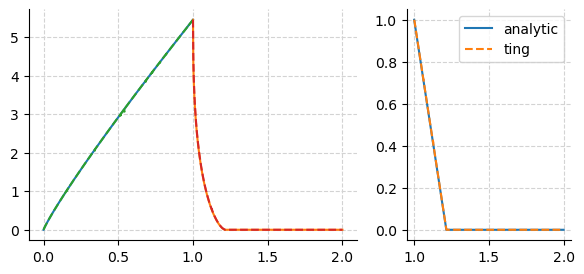

In [4]:
fig, axes = plt.subplots(1, 2, width_ratios=(2, 1), figsize=(7, 3))
axes[0].plot(t_app, f_app, label="analytic")
axes[0].plot(t_ret, f_ret, label="analytic")
axes[0].plot(t_app, f_app_ting, "--", label="ting")
axes[0].plot(t_ret, f_ret_ting, "--", label="ting")

axes[1].plot(t_ret, t1, label="analytic")
axes[1].plot(t_ret, t1_ting_, "--", label="ting")
axes[1].legend()